In [1]:
import scipy.io as scio
from scipy.signal import welch, get_window
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from prettytable import PrettyTable
import matplotlib.pyplot as plot

# please enter the address of input file "session4_train_2018.mat"
path = r'/content/session4_train_2018.mat'  # PATH TO THE FILE
data = scio.loadmat(path)

In [2]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Oct 31 15:13:57 2014',
 '__version__': '1.0',
 '__globals__': [],
 'EEG': array([[(array([[445.6166  , 438.19293 , 410.8425  , ...,  77.167274,  56.849815,
                  63.882782]], dtype=float32), array([[62]], dtype=uint8), array([[124]], dtype=uint8), array(['s'], dtype='<U1'), array([[256]], dtype=uint16))]],
       dtype=[('data', 'O'), ('seizureStart', 'O'), ('seizureEnd', 'O'), ('timeUnits', 'O'), ('srate', 'O')])}

In [6]:
raw = data['EEG'][0][0][0][0]   # EXPERIMENT WITH THIS
raw

array([445.6166  , 438.19293 , 410.8425  , ...,  77.167274,  56.849815,
        63.882782], dtype=float32)

Text(0, 0.5, 'Amplitude')

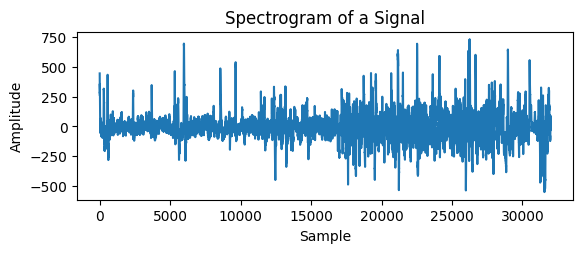

In [7]:
import pandas as pd

plot.subplot(211)
plot.title('Spectrogram of a Signal')

signal = pd.DataFrame(raw)
DF = pd.DataFrame({
    'S': signal.iloc[:,0]
})
plot.plot(DF.S)
plot.xlabel('Sample')
plot.ylabel('Amplitude')


In [11]:
samplingFrequency = data['EEG'][0][0][4][0][0]  #- fix this path!

samplingFrequency

256

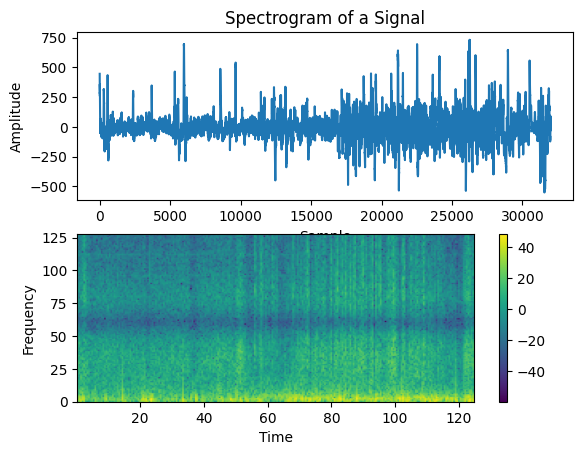

In [12]:
plot.subplot(211)
plot.title('Spectrogram of a Signal')

signal = pd.DataFrame(raw)
DF = pd.DataFrame({
    'S': signal.iloc[:,0]
})
plot.plot(DF.S)
plot.xlabel('Sample')
plot.ylabel('Amplitude')

# Compute and plot a spectrogram of data in x. Data are split into NFFT length segments and the spectrum of each section is computed.
# The windowing function window is applied to each segment, and the amount of overlap of each segment is specified with noverlap. The spectrogram is plotted as a colormap (using imshow).
plot.subplot(212)
# Changing noverlap to be an integer using integer division //
plot.specgram(DF.S,Fs=samplingFrequency,NFFT=samplingFrequency, noverlap=(samplingFrequency//2))
plot.xlabel('Time')
plot.ylabel('Frequency')

plot.colorbar()
plot.show()